In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload 
# module to read raw data
import src.data.data_reading as dr
reload(dr)

# module to clean data 
import src.scripts.data_cleaning as dc
reload(dc)

# module for data wrangling 
import src.utils.data_wrangling as dw
reload(dw)



<module 'src.utils.data_wrangling' from 'c:\\Users\\valbi\\Desktop\\Ma3\\ADA\\Projet1\\ada-2024-project-spaghettisolution - Copie\\src\\utils\\data_wrangling.py'>

In [3]:
characters_df, movies_df, plots_df = dr.read_datas()
movies_df.head(2)

,freebase_id,name,release_date,revenue,runtime,languages,country,genres
wiki_id,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [4]:
movies_clean_df = dc.clean_movies_df(movies_df, plots_df)
print(movies_clean_df.shape)
movies_clean_df.head(5)

(81840, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."


In [5]:
genres = movies_clean_df['genres'].dropna().unique()
unique_genres = set()
for genre_list in genres:
    for genre in genre_list.split(', '):
        unique_genres.add(genre)
genres = np.array(list(unique_genres))
print(genres)
len(genres)

['Whodunit' 'Filipino Movies' 'Epic Western' "Children's/Family"
 'Historical fiction' 'Biographical film' 'Drama' 'Horror' 'Biography'
 'Bengali Cinema' 'Pinku eiga' 'Fantasy Drama' 'Domestic Comedy'
 'Foreign legion' 'Chick flick' 'Americana' 'Sex comedy' 'Expressionism'
 'Finance & Investing' 'Erotic Drama' 'Bollywood' 'Supermarionation'
 'Neorealism' 'Spaghetti Western' 'Action' 'Buddy Picture' 'Time travel'
 'Indie' 'Media Satire' 'Stand-up comedy' 'Comedy of manners' 'Dystopia'
 'Superhero movie' 'Computers' 'Tragicomedy' 'Archaeology'
 'Backstage Musical' 'Creature Film' 'Extreme Sports' 'Social issues'
 'Operetta' 'Disaster' 'Erotic thriller' 'Social problem film'
 'Czechoslovak New Wave' 'Japanese Movies' 'Political satire' 'Dance'
 'Costume drama' 'Fictional film' 'Erotica' 'Revisionist Western'
 'Chase Movie' 'Softcore Porn' 'Culture & Society' 'Archives and records'
 'Slapstick' 'Historical Documentaries' 'Essay Film' 'Art film'
 'Hip hop movies' 'Wuxia' 'Race movie' 'Patri

363

In [6]:
war_action_movies_df = movies_clean_df[movies_clean_df['genres'].str.contains('War|Action', case=False, na=False)]
print(war_action_movies_df.shape)
war_action_movies_df.head()

(12160, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
4227,Barry Lyndon,1975.0,20000000.0,187.0,"French , English , German","United States of America, United Kingdom","Costume drama, Film adaptation, Period piece, ...",:By What Means Redmond Barry Acquired the Sty...
4231,Buffy the Vampire Slayer,1992.0,16624456.0,86.0,English,United States of America,"Action, Horror, Comedy, Horror Comedy",Buffy Summers is introduced as a stereotypica...
4560,Braveheart,1995.0,211409945.0,175.0,"French , Latin , English , Gaelic",United States of America,"Biography, Adventure, History, War film, Actio...","In the 13th century, after several years of po..."


In [7]:
other_movies_df = movies_clean_df[~movies_clean_df.index.isin(war_action_movies_df.index)]
print(other_movies_df.shape)
other_movies_df.head()
american_others_df = other_movies_df[other_movies_df['country'].str.contains('United States of America', case=False, na=False)]
print(american_others_df.shape)


(69680, 8)
(28316, 8)


In [8]:
sub_dfs = [american_others_df.iloc[i:i + 4000] for i in range(0, len(american_others_df), 4000)]
for idx, sub_df in enumerate(sub_dfs):
    print(f"Sub DataFrame {idx} shape: {sub_df.shape}")
    sub_df.to_csv(f'american_others_part_{idx}.csv', index=False)

Sub DataFrame 0 shape: (4000, 8)
Sub DataFrame 1 shape: (4000, 8)
Sub DataFrame 2 shape: (4000, 8)
Sub DataFrame 3 shape: (4000, 8)
Sub DataFrame 4 shape: (4000, 8)
Sub DataFrame 5 shape: (4000, 8)
Sub DataFrame 6 shape: (4000, 8)
Sub DataFrame 7 shape: (316, 8)


In [3]:
war_action_movies_df.to_csv('war_action_movies.csv', index=False)


NameError: name 'war_action_movies_df' is not defined

In [5]:
war_action_movies_df = pd.read_csv('../war_action_movies.csv')
print(war_action_movies_df.shape)
war_action_movies_df.head()

(12160, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
0,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
1,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
2,Barry Lyndon,1975.0,20000000.0,187.0,"French , English , German","United States of America, United Kingdom","Costume drama, Film adaptation, Period piece, ...",:By What Means Redmond Barry Acquired the Sty...
3,Buffy the Vampire Slayer,1992.0,16624456.0,86.0,English,United States of America,"Action, Horror, Comedy, Horror Comedy",Buffy Summers is introduced as a stereotypica...
4,Braveheart,1995.0,211409945.0,175.0,"French , Latin , English , Gaelic",United States of America,"Biography, Adventure, History, War film, Actio...","In the 13th century, after several years of po..."


In [22]:
war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
war_action_movies_df = war_action_movies_df[war_action_movies_df['country'].str.contains('united states of america', case=False, na=False)]


C:\Users\valbi\AppData\Local\Temp\ipykernel_1960\1732880539.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  war_action_movies_df = war_action_movies_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [23]:
keywords = ['russia', 'russian', 'soviet', 'moscow', 'kremlin', 'kgb','USSR']
pattern = '|'.join(keywords)
russia_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(russia_related_movies_df.shape)
russia_related_movies_df.head()

(276, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
2,barry lyndon,1975.0,20000000.0,187.00,"french , english , german","united states of america, united kingdom","costume drama, film adaptation, period piece, ...",:by what means redmond barry acquired the sty...
6,batman,1966.0,NaN,104.00,english,united states of america,"parody, superhero movie, camp, action/adventur...",when batman and robin get a tip that commodo...
13,escape from new york,1981.0,50000000.0,99.00,english,"united states of america, united kingdom","thriller, crime fiction, science fiction, indi...","in a dystopian 1988, crime in the united state..."
42,threads,1984.0,NaN,112.45,english,"united states of america, australia, united ki...","doomsday film, nuclear warfare, drama, war fil...",young lovers ruth beckett and jimmy kemp dec...
52,k-19: the widowmaker,2002.0,65716126.0,138.00,"russian , english","united states of america, canada, united kingd...","thriller, action thrillers, history, action/ad...","in 1961, the soviet union launches its first b..."


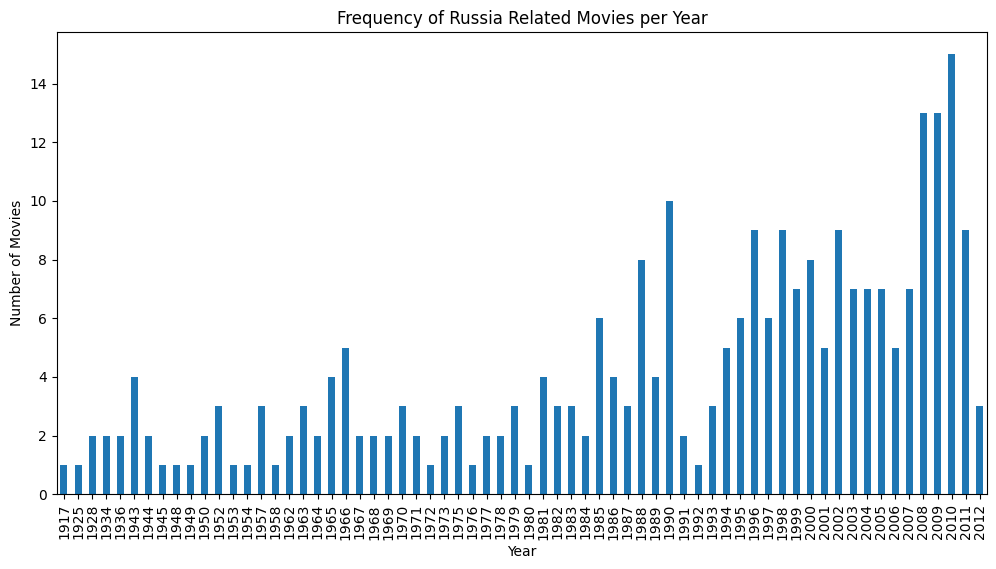

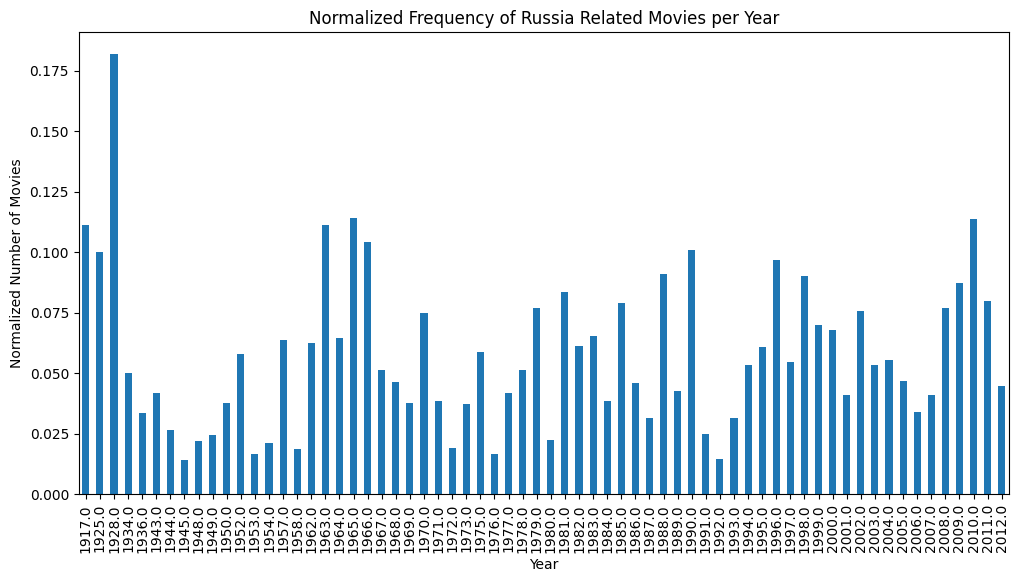

In [ ]:
total_movies_per_year = war_action_movies_df['release_date'].value_counts().sort_index()
russia_movies_per_year = russia_related_movies_df['release_date'].value_counts().sort_index()

normalized_russia_movies_per_year = russia_movies_per_year / total_movies_per_year


russia_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Russia Related Movies per Year')
plt.show()

normalized_russia_movies_per_year = normalized_russia_movies_per_year[normalized_russia_movies_per_year > 0]

normalized_russia_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Russia Related Movies per Year')
plt.show()

In [59]:
keywords = ['iran', 'iraq', 'afghanistan', 'syria', 'arabic', 'middle east']
pattern = '|'.join(keywords)
middle_east_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(middle_east_related_movies_df.shape)
middle_east_related_movies_df.head()

(112, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
42,threads,1984.0,NaN,112.45,english,"united states of america, australia, united ki...","doomsday film, nuclear warfare, drama, war fil...",young lovers ruth beckett and jimmy kemp dec...
104,under siege 2: dark territory,1995.0,104324083.0,103.00,english,united states of america,"thriller, action/adventure, action thrillers, ...",casey ryback has retired from the united stat...
237,die another day,2002.0,431900000.0,133.00,"italian , korean , spanish , cantonese, englis...","united states of america, united kingdom","thriller, glamorized spy film, action, adventure",james bond infiltrates a north korean military...
278,the animatrix,2003.0,NaN,69.00,"japanese , english","united states of america, japan","science fiction, japanese movies, adventure, a...",the plot-summaries of the shorts are listed be...
289,three kings,1999.0,107752036.0,112.00,"arabic , english","united states of america, australia","crime fiction, adventure, gulf war, comedy-dra...",the film opens with an iraqi regular army sold...


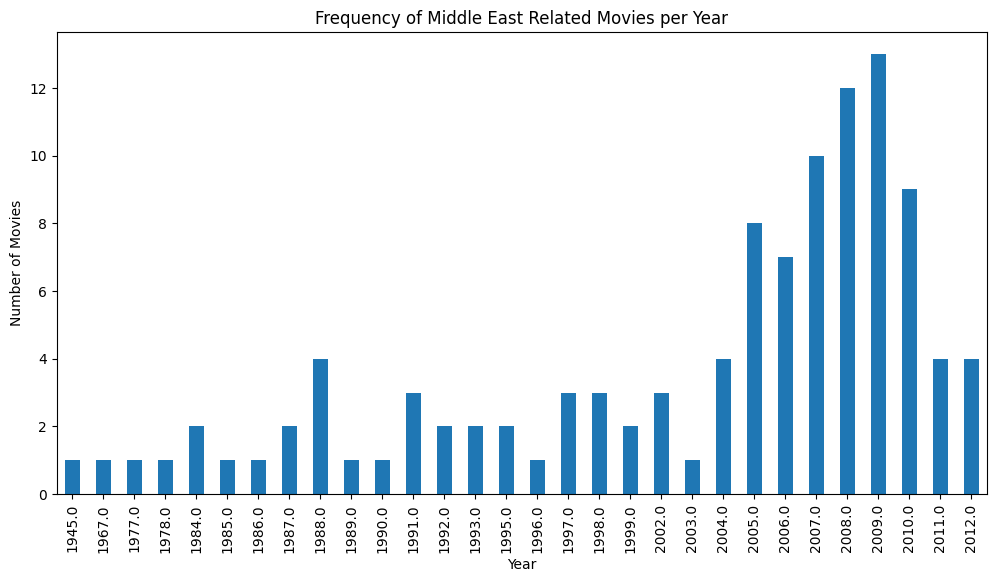

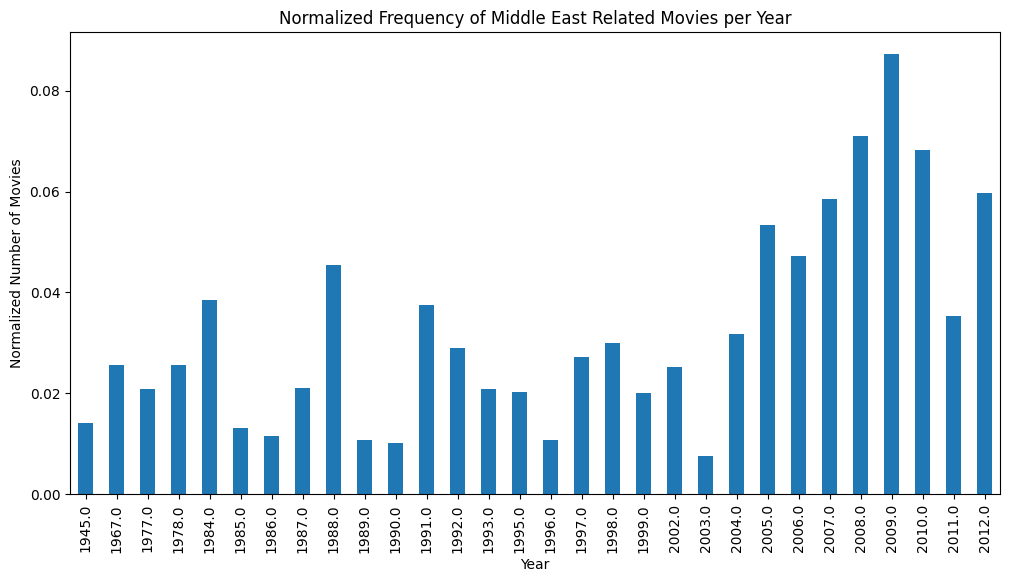

In [ ]:
total_movies_per_year = war_action_movies_df['release_date'].value_counts().sort_index()
middle_east_movies_per_year = middle_east_related_movies_df['release_date'].value_counts().sort_index()

normalized_middle_east_movies_per_year = middle_east_movies_per_year / total_movies_per_year


middle_east_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Middle East Related Movies per Year')
plt.show()

normalized_middle_east_movies_per_year = normalized_middle_east_movies_per_year[normalized_middle_east_movies_per_year> 0]
normalized_middle_east_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Middle East Related Movies per Year')
plt.show()

In [27]:
keywords = ['china', 'chinese', 'beijing', 'shanghai', 'hong kong', 'taiwan']
pattern = '|'.join(keywords)
china_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(china_related_movies_df.shape)
china_related_movies_df.head()

(237, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
13,escape from new york,1981.0,50000000.0,99.0,english,"united states of america, united kingdom","thriller, crime fiction, science fiction, indi...","in a dystopian 1988, crime in the united state..."
14,enter the dragon,1973.0,NaN,99.0,"english , standard cantonese","united states of america, hong kong","thriller, crime fiction, action, drama",lee is a shaolin martial artist from hong kon...
48,forrest gump,1994.0,677387716.0,136.0,english,united states of america,"coming of age, comedy film, drama, war film, r...","as he waits at a bus stop, forrest gump star..."
67,armageddon,1998.0,553709788.0,150.0,"english , russian",united states of america,"thriller, disaster, science fiction, action, a...",a massive meteor shower destroys the space sh...
75,the manchurian candidate,1962.0,7716923.0,129.0,english,united states of america,"thriller, political thriller, cold war, film a...","during the korean war, the soviets capture an ..."


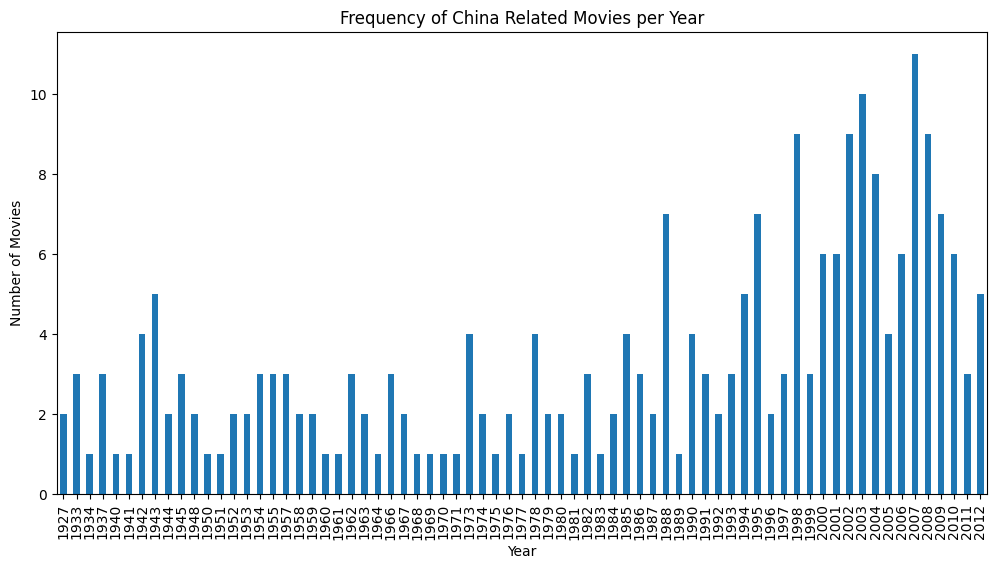

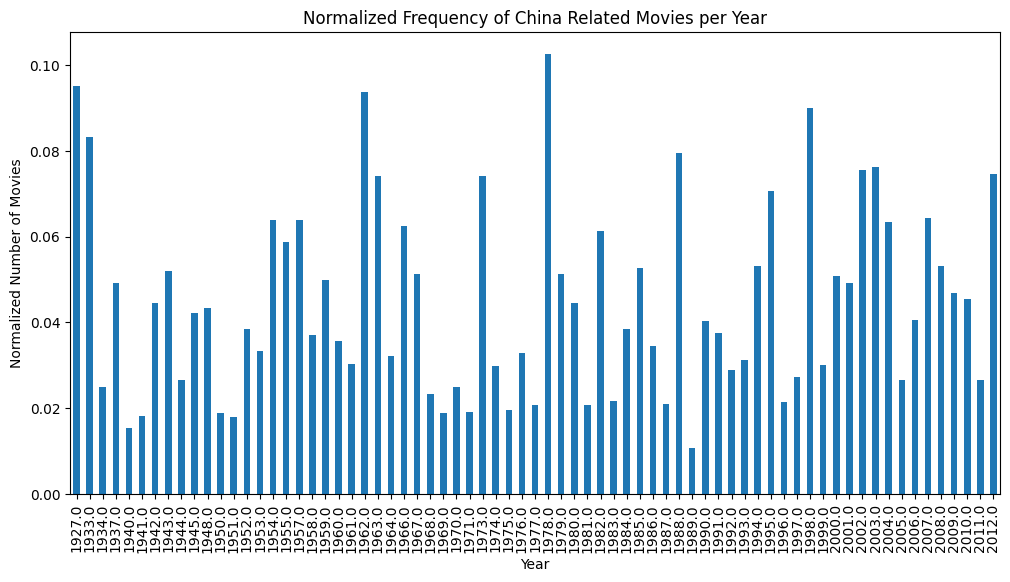

In [ ]:
china_movies_per_year = china_related_movies_df['release_date'].value_counts().sort_index()

normalized_china_movies_per_year = china_movies_per_year / total_movies_per_year


china_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of China Related Movies per Year')
plt.show()

normalized_china_movies_per_year = normalized_china_movies_per_year[normalized_china_movies_per_year> 0]
normalized_china_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of China Related Movies per Year')
plt.show()

In [ ]:
keywords = ['nazi', 'hitler', 'third reich', 'gestapo', 'holocaust','iii reich', 'reichsführer', 'reichstag', 'reichsmark',' ss ']
pattern = '|'.join(keywords)

nazi_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(nazi_related_movies_df.shape)
nazi_related_movies_df.head()

(216, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
35,the terminator,1984.0,78371200.0,107.0,"english , spanish",united states of america,"thriller, science fiction, indie, doomsday fil...","in a post-apocalyptic 2029, artificially inte..."
70,indiana jones and the raiders of the lost ark,1981.0,389925971.0,115.0,"arabic , nepali , spanish , hebrew , english ,...",united states of america,"adventure, costume adventure, action/adventure...","in 1936, archaeologist indiana jones braves an..."
73,casablanca,1942.0,3700000.0,102.0,"french , italian , german , english",united states of america,"black-and-white, drama, war film, romantic dra...",cynical american expatriate rick blaine is th...
90,foreign correspondent,1940.0,1598435.0,119.0,"dutch , english",united states of america,"thriller, political thriller, spy, black-and-w...",the editor of the new york globe ([[harry dav...
92,the long voyage home,1940.0,580129.0,100.0,english,united states of america,"film adaptation, black-and-white, action/adven...",the film tells the story of the crew aboard an...


In [77]:
nazi_1913_film = nazi_related_movies_df[nazi_related_movies_df['release_date'] == 1913]
nazi_1913_film

,name,release_date,revenue,runtime,languages,country,genres,plot


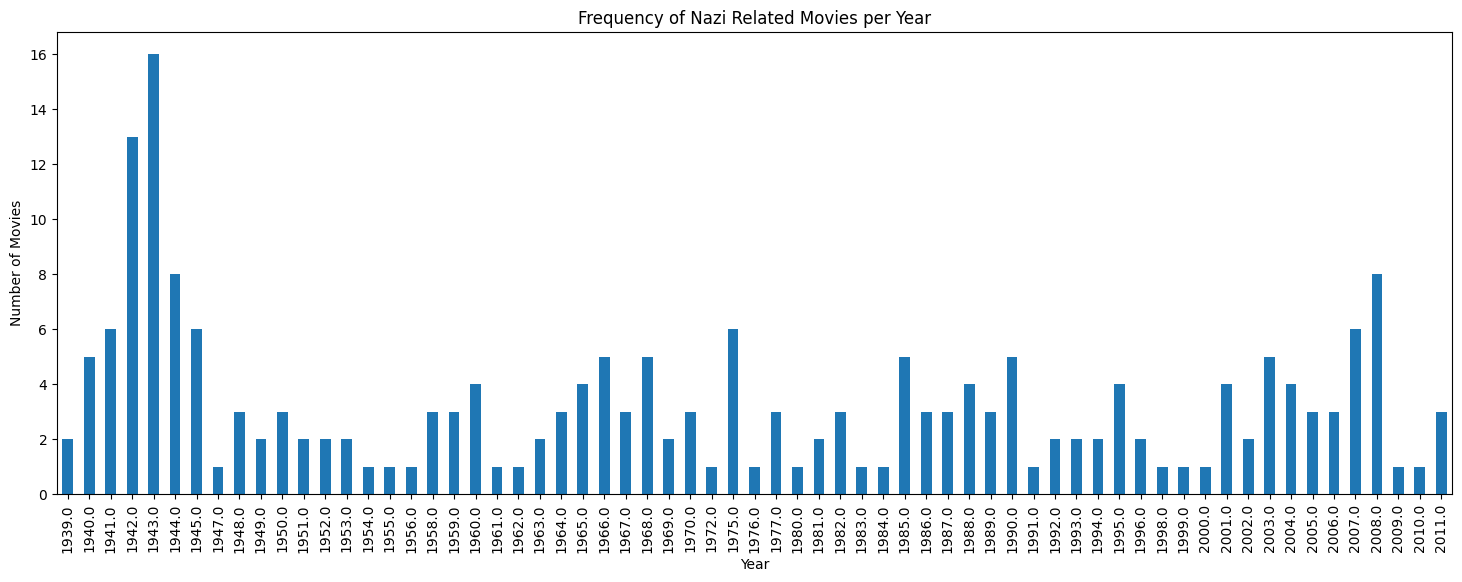

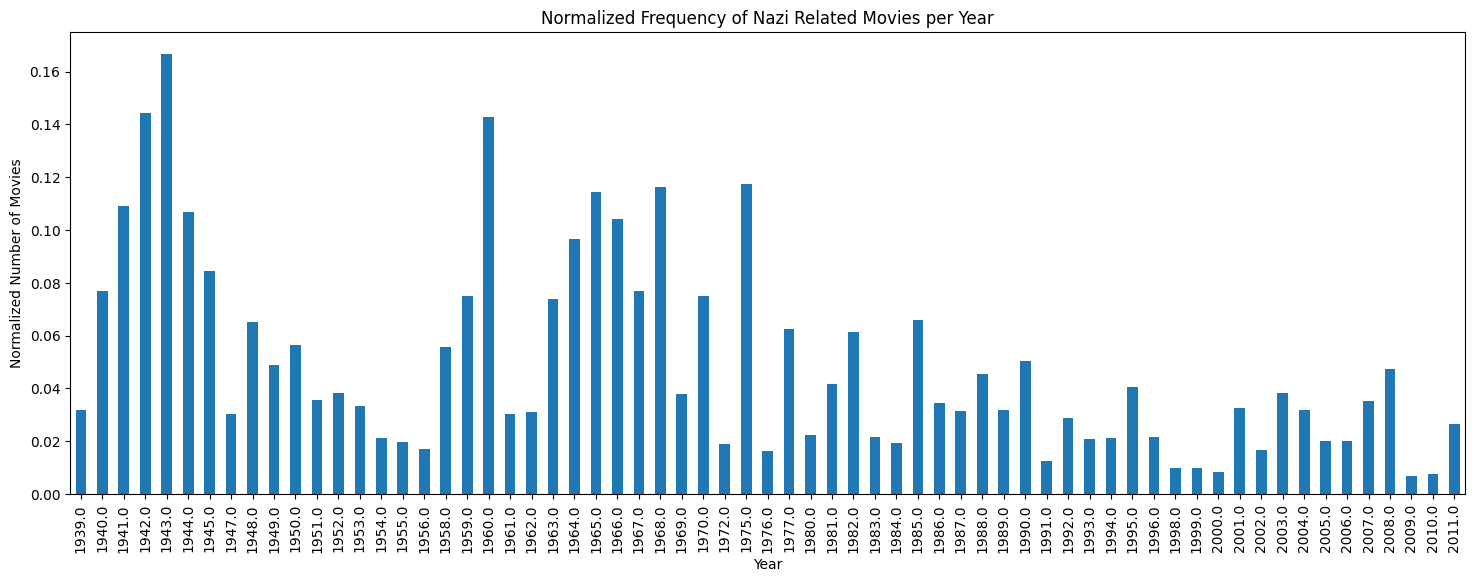

In [ ]:
nazi_movies_per_year = nazi_related_movies_df['release_date'].value_counts().sort_index()

normalized_nazi_movies_per_year = nazi_movies_per_year / total_movies_per_year


nazi_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Nazi Related Movies per Year')
plt.show()

normalized_nazi_movies_per_year = normalized_nazi_movies_per_year[normalized_nazi_movies_per_year> 0]
normalized_nazi_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Nazi Related Movies per Year')
plt.show()

In [ ]:
keywords = ['vietnam', 'viet cong', 'saigon', 'hanoi', 'vietminh']
pattern = '|'.join(keywords)

vietnam_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(vietnam_related_movies_df.shape)
vietnam_related_movies_df.head()

(147, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
17,full metal jacket,1987.0,46300000.0,112.0,"vietnamese , english","united states of america, united kingdom","anti-war, war film, period piece, drama, film ...","in 1967, during the vietnam war, a group of ne..."
48,forrest gump,1994.0,677387716.0,136.0,english,united states of america,"coming of age, comedy film, drama, war film, r...","as he waits at a bus stop, forrest gump star..."
97,above the law,1988.0,18869631.0,99.0,"english , spanish","united states of america, hong kong","thriller, action/adventure, action, martial ar...","sergeant nicolo ""nico"" toscani is a detective..."
169,the karate kid,1984.0,90815558.0,127.0,"japanese , english","united states of america, japan","action/adventure, japanese movies, adventure, ...","daniel larusso , a high school senior, moves w..."
195,coming home,1978.0,32653905.0,126.0,english,united states of america,"drama, war film, romantic drama, romance film,...","in the spring of 1968 in california, sally , a..."


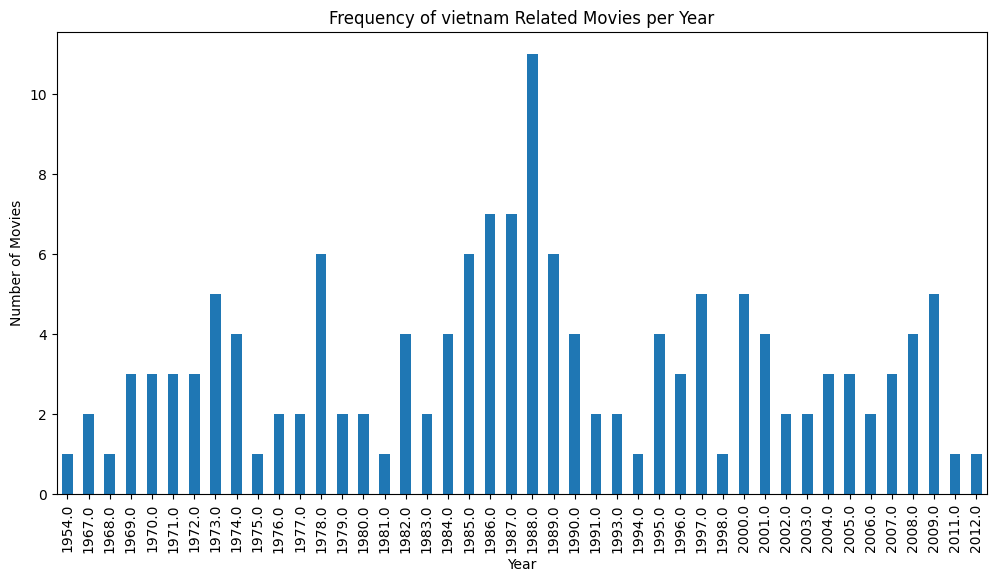

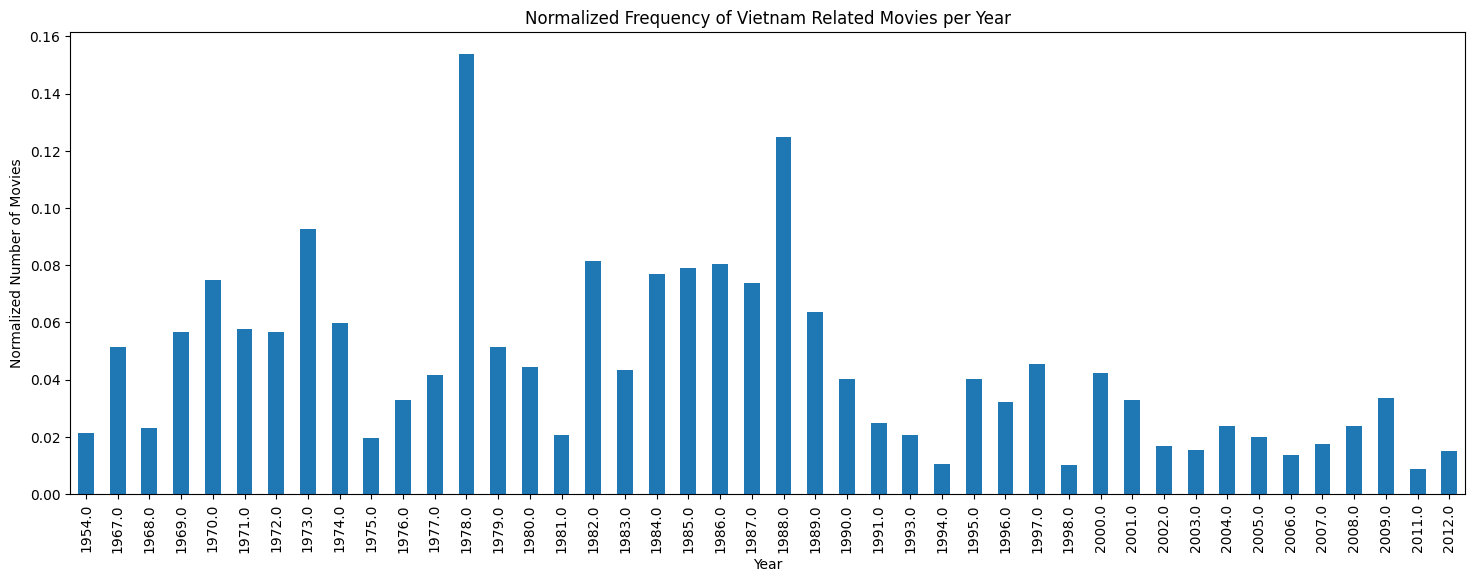

In [ ]:
vietnam_related_movies_df['release_date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of vietnam Related Movies per Year')
plt.show()

vietnam_movies_per_year = vietnam_related_movies_df['release_date'].value_counts().sort_index()

normalized_vietnam_movies_per_year = vietnam_movies_per_year / total_movies_per_year

normalized_vietnam_movies_per_year = normalized_vietnam_movies_per_year[normalized_vietnam_movies_per_year> 0]
normalized_vietnam_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Vietnam Related Movies per Year')
plt.show()

In [94]:
keywords = ['ussr', 'soviet', 'kgb', 'stalin', 'staline', 'gorbatchev','lenin', 'trotsky']
pattern = '|'.join(keywords)

# Filter the DataFrame for Vietnam-related movies
USSR_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(USSR_related_movies_df.shape)
USSR_related_movies_df.head()

(123, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
6,batman,1966.0,NaN,104.00,english,united states of america,"parody, superhero movie, camp, action/adventur...",when batman and robin get a tip that commodo...
13,escape from new york,1981.0,50000000.0,99.00,english,"united states of america, united kingdom","thriller, crime fiction, science fiction, indi...","in a dystopian 1988, crime in the united state..."
42,threads,1984.0,NaN,112.45,english,"united states of america, australia, united ki...","doomsday film, nuclear warfare, drama, war fil...",young lovers ruth beckett and jimmy kemp dec...
52,k-19: the widowmaker,2002.0,65716126.0,138.00,"russian , english","united states of america, canada, united kingd...","thriller, action thrillers, history, action/ad...","in 1961, the soviet union launches its first b..."
75,the manchurian candidate,1962.0,7716923.0,129.00,english,united states of america,"thriller, political thriller, cold war, film a...","during the korean war, the soviets capture an ..."


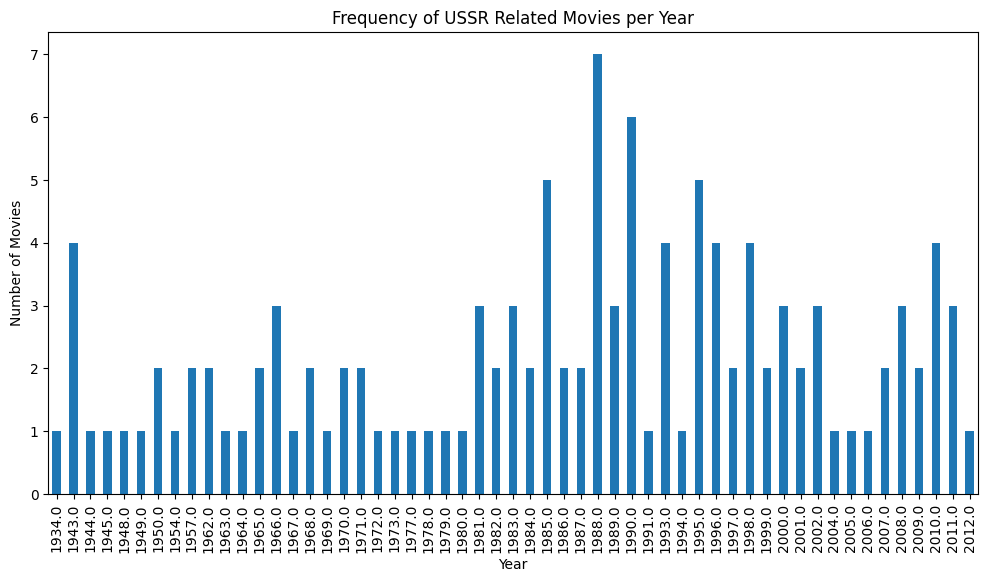

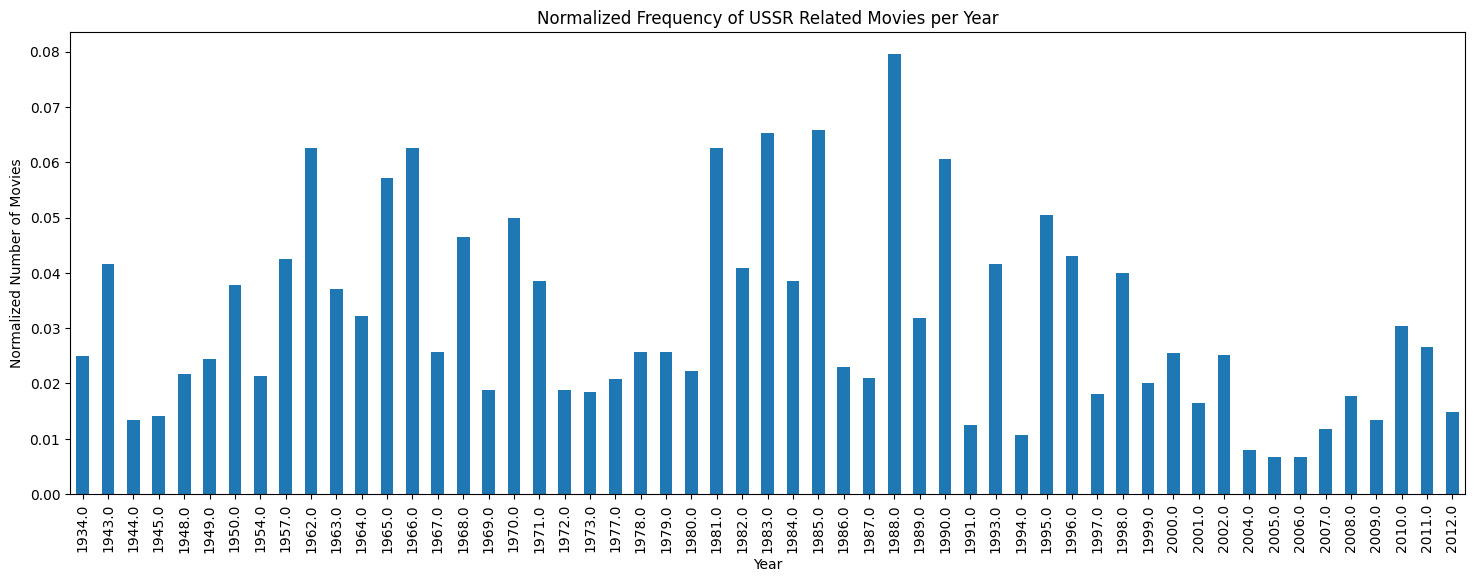

In [96]:
USSR_related_movies_df['release_date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of USSR Related Movies per Year')
plt.show()

USSR_movies_per_year = USSR_related_movies_df['release_date'].value_counts().sort_index()

normalized_USSR_movies_per_year = USSR_movies_per_year / total_movies_per_year

normalized_USSR_movies_per_year = normalized_USSR_movies_per_year[normalized_USSR_movies_per_year> 0]
normalized_USSR_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of USSR Related Movies per Year')
plt.show()

In [89]:
keywords = ['russia', 'russian', 'putin']
pattern = '|'.join(keywords)

# Filter the DataFrame for Vietnam-related movies
RussiaOnly_related_movies_df = war_action_movies_df[war_action_movies_df['plot'].str.lower().str.contains(pattern, na=False)]
print(USSR_related_movies_df.shape)
RussiaOnly_related_movies_df.head()

(122, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
2,barry lyndon,1975.0,20000000.0,187.0,"french , english , german","united states of america, united kingdom","costume drama, film adaptation, period piece, ...",:by what means redmond barry acquired the sty...
52,k-19: the widowmaker,2002.0,65716126.0,138.0,"russian , english","united states of america, canada, united kingd...","thriller, action thrillers, history, action/ad...","in 1961, the soviet union launches its first b..."
58,reds,1981.0,50000000.0,194.0,"france, finnish , english , russian , german",united states of america,"biographical film, biography, period piece, dr...",the film covers the life of john reed and loui...
67,armageddon,1998.0,553709788.0,150.0,"english , russian",united states of america,"thriller, disaster, science fiction, action, a...",a massive meteor shower destroys the space sh...
105,the glimmer man,1996.0,46600000.0,92.0,english,united states of america,"thriller, crime fiction, psychological thrille...",jack cole was once a government intelligence ...


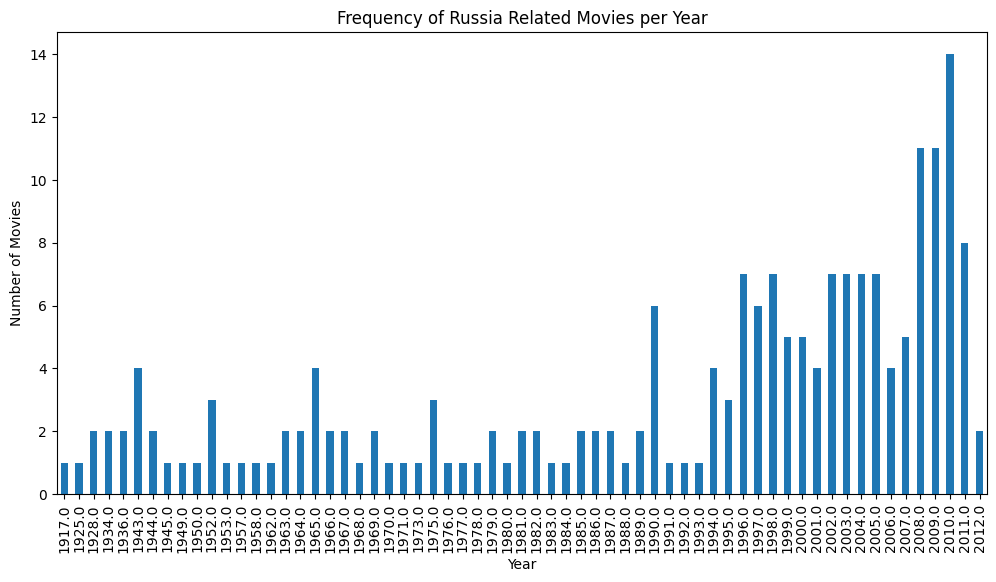

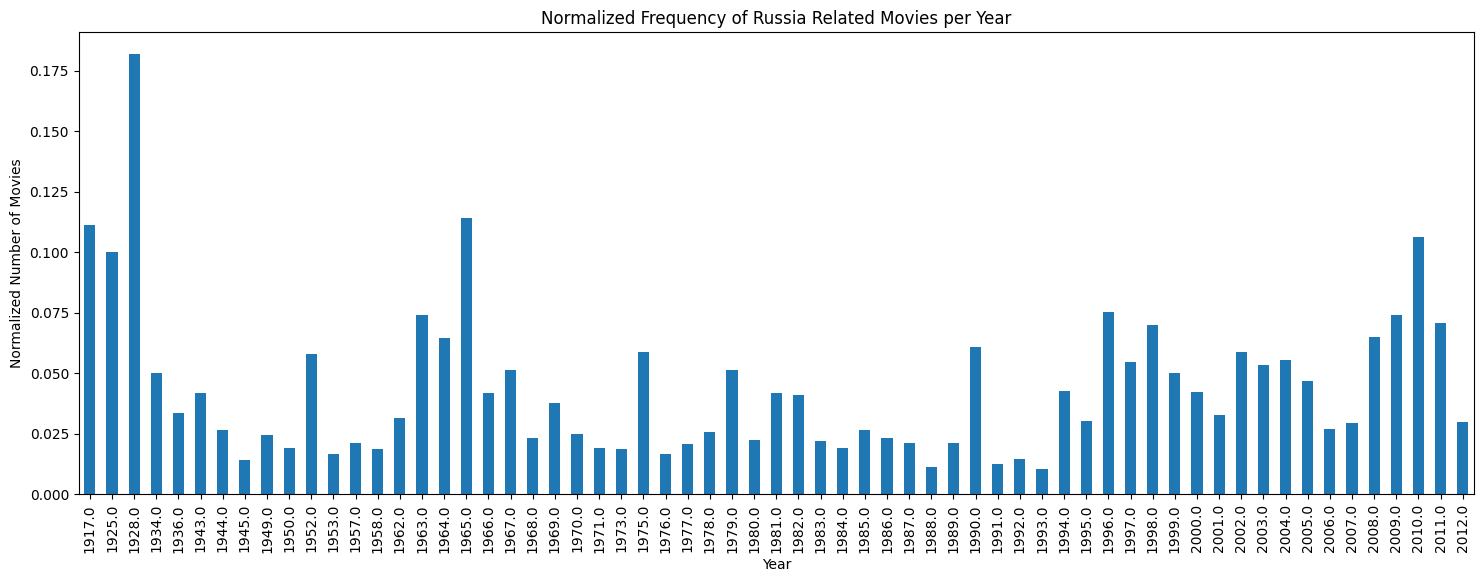

In [97]:
RussiaOnly_related_movies_df['release_date'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Russia Related Movies per Year')
plt.show()

RussiaOnly_movies_per_year = RussiaOnly_related_movies_df['release_date'].value_counts().sort_index()

normalized_RussiaOnly_movies_per_year = RussiaOnly_movies_per_year / total_movies_per_year

normalized_RussiaOnly_movies_per_year = normalized_RussiaOnly_movies_per_year[normalized_RussiaOnly_movies_per_year> 0]
normalized_RussiaOnly_movies_per_year.plot(kind='bar', figsize=(18, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Russia Related Movies per Year')
plt.show()

In [91]:
russian_films_before_1929 = RussiaOnly_related_movies_df[RussiaOnly_related_movies_df['release_date'] < 1929]
print(russian_films_before_1929.shape)
russian_films_before_1929

(4, 8)


,name,release_date,revenue,runtime,languages,country,genres,plot
989,the last command,1928.0,NaN,88.0,"silent film, english",united states of america,"silent film, indie, black-and-white, period pi...","in 1928 hollywood, director leo andreyev look..."
1686,the eagle,1925.0,NaN,91.0,"silent film, english",united states of america,"silent film, indie, black-and-white, action/ad...","vladimir dubrovsky , a cossack serving in the ..."
6323,the little american,1917.0,NaN,64.0,"silent film, english",united states of america,"silent film, drama, indie, black-and-white, wa...",karl von austreim ([[jack holt lives in ameri...
8226,the mysterious lady,1928.0,NaN,NaN,"silent film, english",united states of america,"silent film, black-and-white, drama, romantic ...","in vienna, captain karl von raden purchases a..."


In [101]:
star_wars_df = war_action_movies_df[war_action_movies_df["name"].str.contains("Star Wars", case=False, na=False)]